In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
import math

Using TensorFlow backend.


In [2]:
height = 64
width = 256
channel = 3

In [3]:
clean_data=[]
path='/home/evren/classified_data/clean_data/clean_data/'
files=os.listdir(path)
for i in tqdm(files):
    img=cv2.imread(path+'/'+i,1)
    img=cv2.resize(img,(height, width))
    clean_data.append(img_to_array(img))

100%|██████████| 69071/69071 [09:47<00:00, 117.62it/s]


In [8]:
noisy_15dB=[]
path_15dB='/home/evren/classified_data/noisy_data/15dB/15dB/'
files=os.listdir(path_15dB)
for i in tqdm(files):
    img=cv2.imread(path_15dB+'/'+i,1)
    img=cv2.resize(img,(height,width))
    noisy_15dB.append(img_to_array(img))

100%|██████████| 69071/69071 [08:40<00:00, 132.63it/s] 


In [5]:
clean_data = np.reshape(clean_data, (len(clean_data), height, width, channel))
clean_data = clean_data.astype('float32') / 255.

In [10]:
noisy_15dB = np.reshape(noisy_15dB, (len(noisy_15dB), height, width, channel))
noisy_15dB = noisy_15dB.astype('float32') / 255.

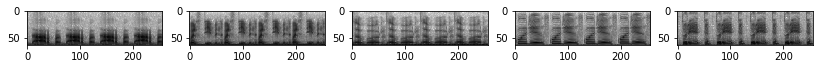

In [6]:
# Displaying clean images
plt.figure(figsize=(17,4))
for i in range(1,6):
    ax = plt.subplot(1,6,i)
    plt.imshow(clean_data[i], cmap='binary')
plt.show()

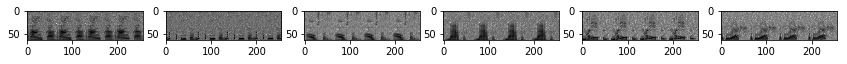

In [11]:
# Displaying 15dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(noisy_15dB[i], cmap='binary')
plt.show()

In [12]:
model3 = Sequential([
    
    # encoder
    Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(height,width,channel)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2),strides=(2,2)),
    

    # decoder
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    
    Conv2D(3, (3,3), padding="same", activation="relu")
    
])

In [13]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 256, 64)       1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 256, 64)       36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 128, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 128, 128)      73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 128, 128)      147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 64, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 64, 256)       2

In [14]:
model3.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# For more information on categorical cross entropy loss function see 
# https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/

In [15]:
history = model3.fit(noisy_15dB, clean_data,
          validation_split=0.2,
          batch_size=128,
          epochs=5)

Train on 55256 samples, validate on 13815 samples
Epoch 1/5
55256/55256 [==============================] - 7934s 144ms/sample - loss: nan - accuracy: 0.9978 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/5
55256/55256 [==============================] - 7910s 143ms/sample - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/5
55256/55256 [==============================] - 7913s 143ms/sample - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/5
55256/55256 [==============================] - 7917s 143ms/sample - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/5
55256/55256 [==============================] - 7917s 143ms/sample - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000


In [7]:
noisy_20dB=[]
path_20dB='/home/evren/classified_data/noisy_data/20dB/20dB/'
files=os.listdir(path_20dB)
for i in tqdm(files):
    img=cv2.imread(path_20dB+'/'+i,1)
    img=cv2.resize(img,(height,width))
    noisy_20dB.append(img_to_array(img))
    

noisy_20dB = np.reshape(noisy_20dB, (len(noisy_20dB), height, width, channel))
noisy_20dB = noisy_20dB.astype('float32') / 255.

# Displaying 20dB images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(noisy_20dB[i], cmap='binary')
plt.show()

 18%|█▊        | 12196/69071 [01:51<08:41, 109.12it/s]


KeyboardInterrupt: 

In [ ]:
noisy_25dB=[]
path_25dB='/home/evren/classified_data/noisy_data/25dB/25dB'
files=os.listdir(path_25dB)
for i in tqdm(files):
    img=cv2.imread(path_25dB+'/'+i,1)
    img=cv2.resize(img,(height,width))
    noisy_25dB.append(img_to_array(img))
    
noisy_30dB=[]
path_30dB='/home/evren/classified_data/noisy_data/30dB/30dB'
files=os.listdir(path_30dB)
for i in tqdm(files):
    img=cv2.imread(path_30dB+'/'+i,1)
    img=cv2.resize(img,(height,width))
    noisy_30dB.append(img_to_array(img))
    
noisy_100dB=[]
path_100dB='/home/evren/classified_data/noisy_data/100dB/100dB'
files=os.listdir(path_100dB)
for i in tqdm(files):
    img=cv2.imread(path_100dB+'/'+i,1)
    img=cv2.resize(img,(height,width))
    noisy_100dB.append(img_to_array(img))

In [ ]:
noisy_25dB = np.reshape(noisy_25dB, (len(noisy_25dB), height, width, channel))
noisy_25dB = noisy_25dB.astype('float32') / 255.

noisy_30dB = np.reshape(noisy_30dB, (len(noisy_30dB), height, width, channel))
noisy_30dB = noisy_30dB.astype('float32') / 255.

noisy_100dB = np.reshape(noisy_100dB, (len(noisy_100dB), height, width, channel))
noisy_100dB = noisy_100dB.astype('float32') / 255.